In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import statsmodels.api as sm

In [5]:


class DataOverview:
    def __init__(self, df: pd.DataFrame):
        self.df = df
    
    def basic_info(self):
        """Displays number of rows, columns, and data types."""
        print("\n### Basic Information ###")
        print(f"Number of Rows: {self.df.shape[0]}")
        print(f"Number of Columns: {self.df.shape[1]}")
        print("\nColumn Data Types:")
        print(self.df.dtypes)
        print("\nMemory Usage:")
        print(self.df.memory_usage(deep=True).sum(), "bytes")
    
    def summary_statistics(self):
        """Displays summary statistics for numerical and categorical columns."""
        print("\n### Summary Statistics ###")
        print("\nNumerical Summary:")
        print(self.df.describe())
        
        print("\nCategorical Summary:")
        print(self.df.describe(include=['object']))
    
    def data_quality_checks(self):
        """Checks for missing values, duplicate rows, and unique values in key columns."""
        print("\n### Data Quality Checks ###")
        print("\nMissing Values:")
        print(self.df.isnull().sum())
        
        print("\nDuplicate Rows:")
        print(f"Total Duplicates: {self.df.duplicated().sum()}")
        
        print("\nUnique Values per Column:")
        print(self.df.nunique())
    
    def integrity_checks(self):
        """Checks for invalid values in numeric columns and date range validity."""
        print("\n### Basic Integrity Checks ###")
        
        if 'Order_Date' in self.df.columns:
            print(f"Min Order Date: {self.df['Order_Date'].min()}")
            print(f"Max Order Date: {self.df['Order_Date'].max()}")
        
        if {'Quantity', 'Unit_Price', 'Total_Price'}.issubset(self.df.columns):
            print("\nNegative or Zero Values Check:")
            for col in ['Quantity', 'Unit_Price', 'Total_Price']:
                invalid_count = (self.df[col] <= 0).sum()
                print(f"{col}: {invalid_count} invalid values")
        
        if 'Discount' in self.df.columns:
            print("\nDiscount Range Check:")
            invalid_discounts = ((self.df['Discount'] < 0) | (self.df['Discount'] > 1)).sum()
            print(f"Invalid Discounts: {invalid_discounts}")
    
    def run_all_checks(self):
        """Runs all overview checks."""
        self.basic_info()
        self.summary_statistics()
        self.data_quality_checks()
        self.integrity_checks()


df = pd.read_csv("data/synthetic_beverage_sales_data.csv")
overview = DataOverview(df)
overview.run_all_checks()


### Basic Information ###
Number of Rows: 8999910
Number of Columns: 11

Column Data Types:
Order_ID          object
Customer_ID       object
Customer_Type     object
Product           object
Category          object
Unit_Price       float64
Quantity           int64
Discount         float64
Total_Price      float64
Region            object
Order_Date        object
dtype: object

Memory Usage:
4474512331 bytes

### Summary Statistics ###

Numerical Summary:
         Unit_Price      Quantity      Discount   Total_Price
count  8.999910e+06  8.999910e+06  8.999910e+06  8.999910e+06
mean   5.818037e+00  2.313813e+01  2.972879e-02  1.307437e+02
std    1.470050e+01  2.689321e+01  4.479841e-02  5.096947e+02
min    3.200000e-01  1.000000e+00  0.000000e+00  3.000000e-01
25%    1.050000e+00  6.000000e+00  0.000000e+00  8.400000e+00
50%    1.750000e+00  1.100000e+01  0.000000e+00  2.114000e+01
75%    3.210000e+00  3.000000e+01  5.000000e-02  6.949000e+01
max    1.695300e+02  1.000000e+02  1.50000

## Observations 

1. The dataset is large, containing 8,999,910 rows and 11 columns, with no missing values or duplicate rows, ensuring completeness.

2. The Order_ID column has 3,000,000 unique values, indicating that each order can contain multiple items, while Customer_ID has only 10,000 unique values, suggesting repeat purchases.

3. The Unit Price ranges from $0.32 to $169.53, with an average of $5.82, while Total Price varies significantly, reaching up to $14,295.30, indicating a mix of low-cost and high-value purchases.

4. The most frequently sold product is "Hohes C Orange", and the most common category is "Alcoholic Beverages", showing product popularity trends.

5. The dataset spans from January 1, 2021, to December 30, 2023, covering almost three years of sales data, allowing for potential trend analysis over time.

## Univariate Analysis 

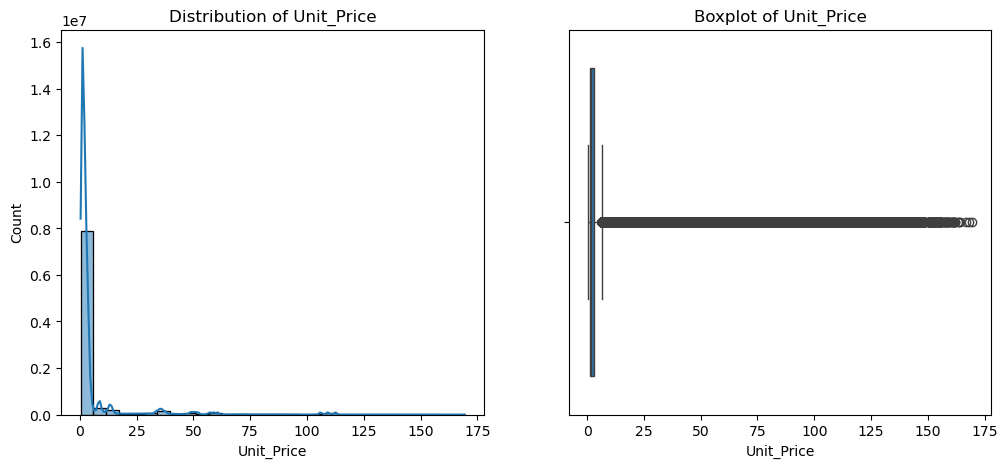

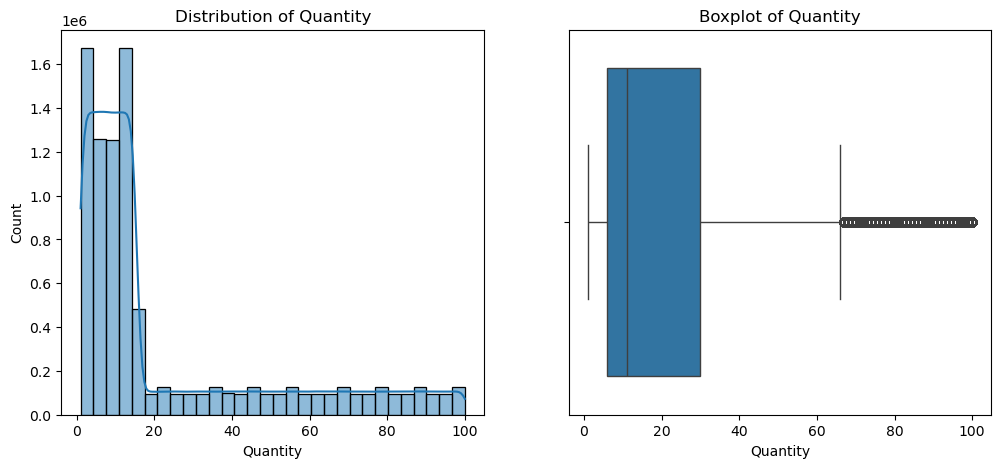

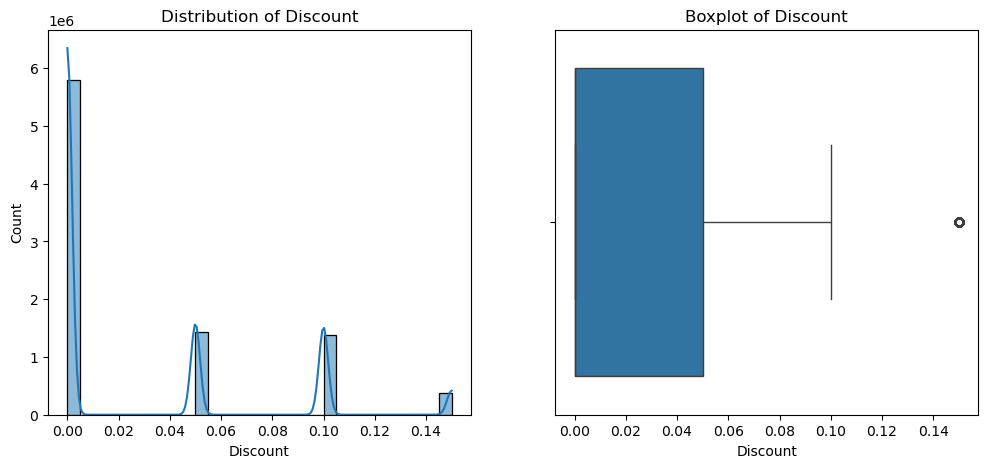

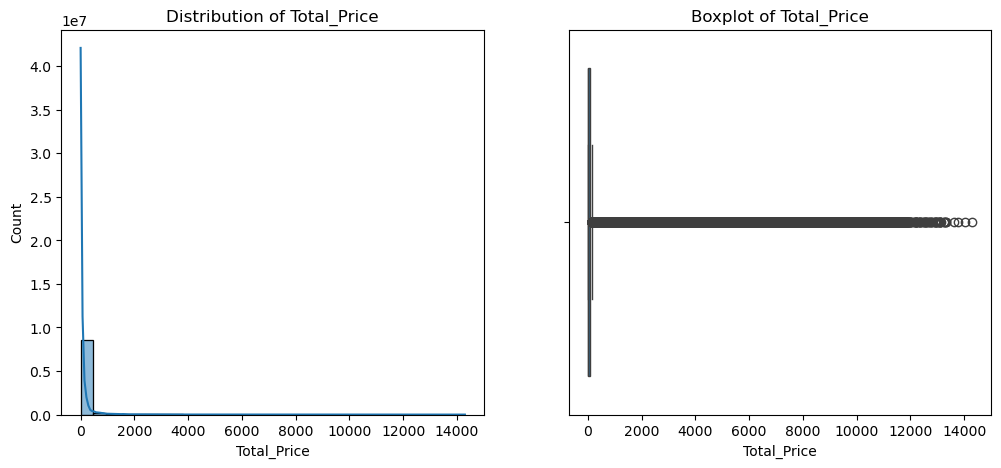

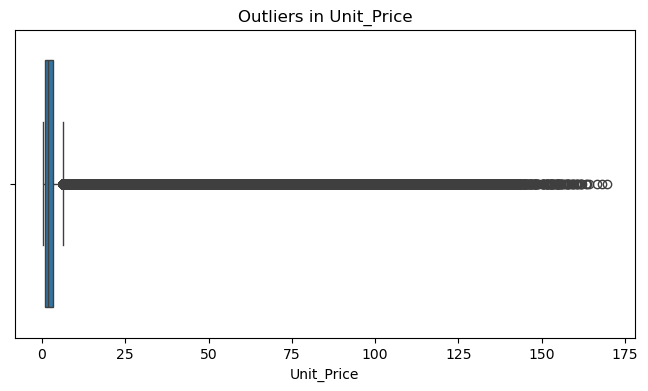

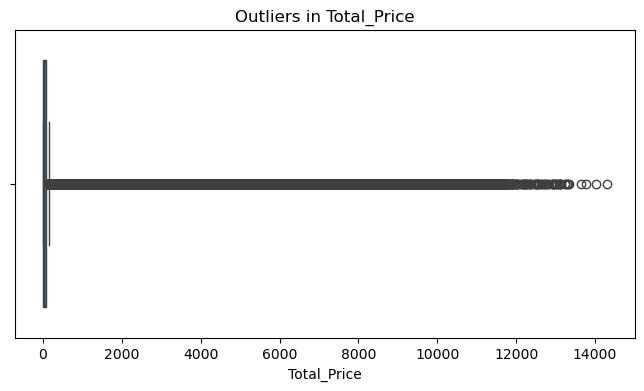

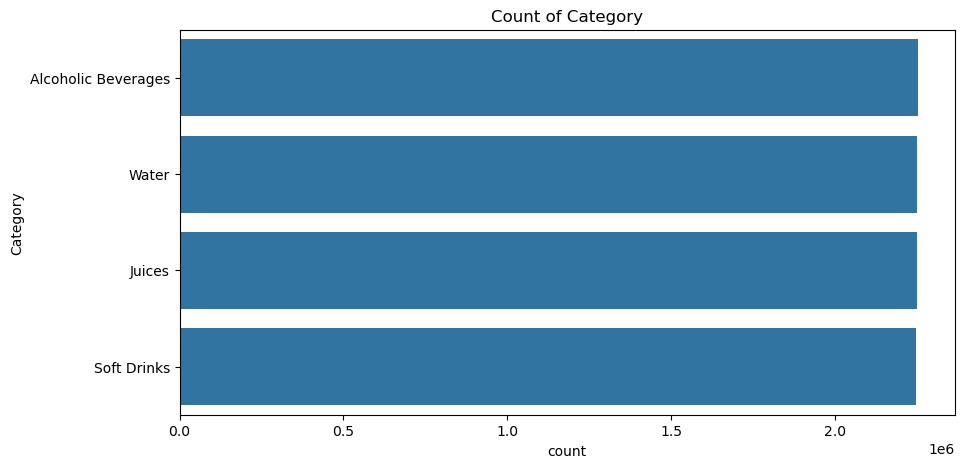

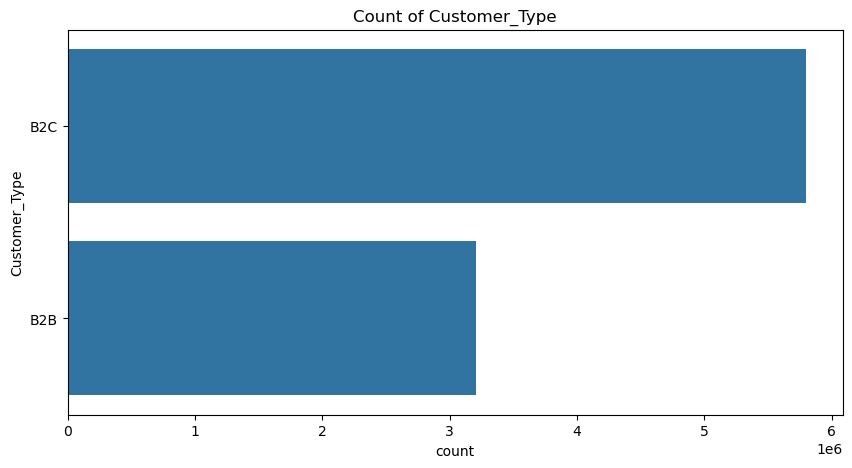

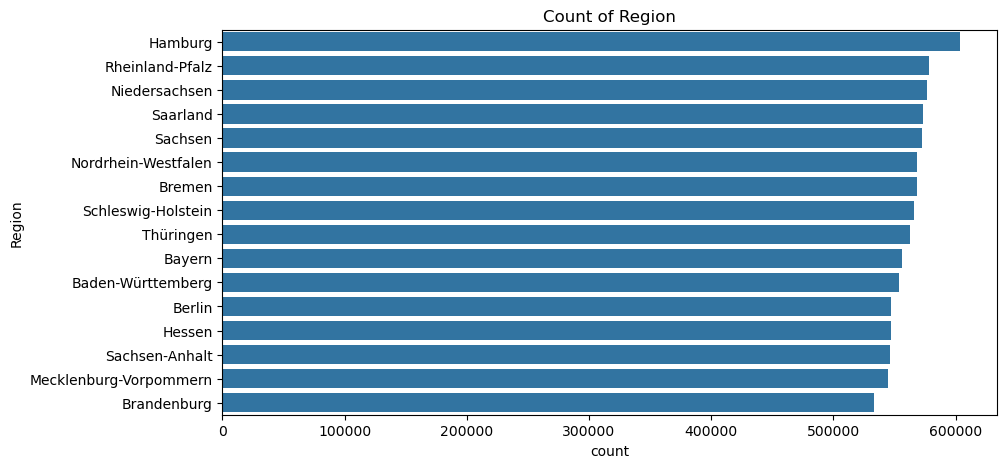

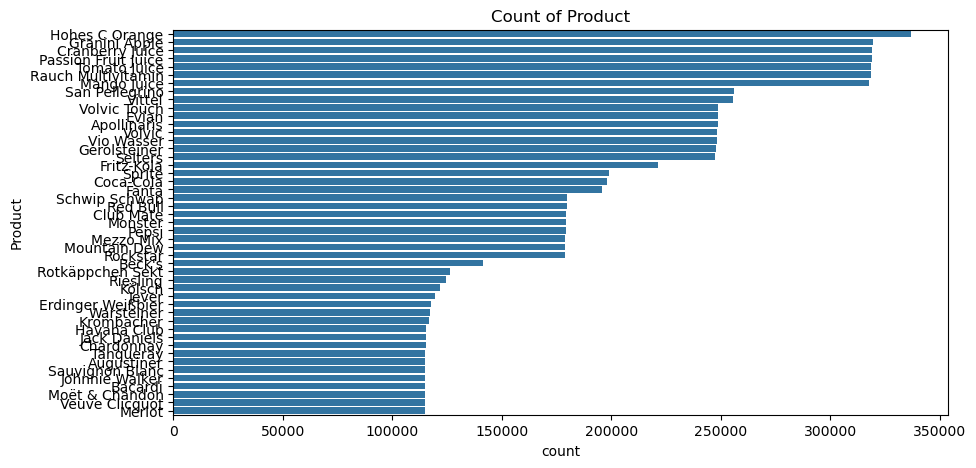

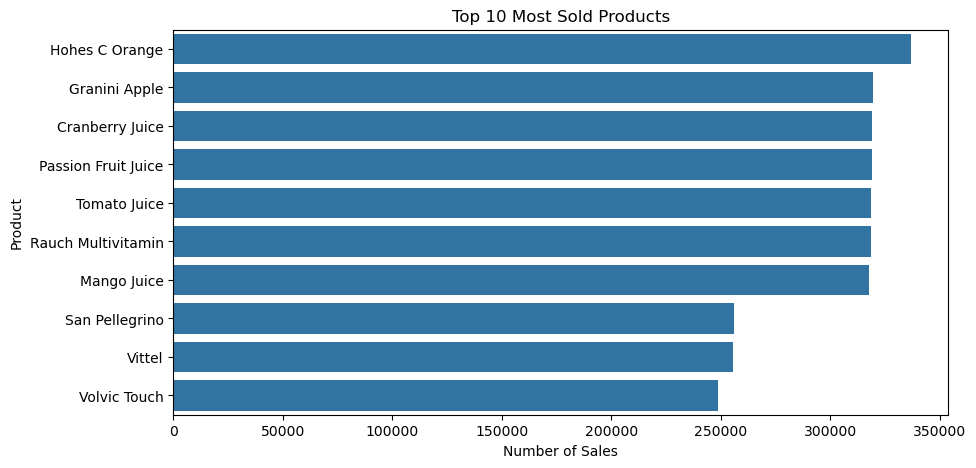

In [6]:


class UnivariateAnalysis:
    def __init__(self, df: pd.DataFrame):
        self.df = df
    
    def plot_numerical_distribution(self):
        """Plots histograms and boxplots for numerical variables."""
        numerical_cols = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price']
        for col in numerical_cols:
            fig, axes = plt.subplots(1, 2, figsize=(12, 5))
            
            sns.histplot(self.df[col], bins=30, kde=True, ax=axes[0])
            axes[0].set_title(f'Distribution of {col}')
            
            sns.boxplot(x=self.df[col], ax=axes[1])
            axes[1].set_title(f'Boxplot of {col}')
            
            plt.show()
    
    def detect_outliers(self):
        """Detects and visualizes outliers using boxplots for key numerical columns."""
        outlier_cols = ['Unit_Price', 'Total_Price']
        for col in outlier_cols:
            plt.figure(figsize=(8, 4))
            sns.boxplot(x=self.df[col])
            plt.title(f'Outliers in {col}')
            plt.show()
    
    def plot_categorical_counts(self):
        """Plots count plots for categorical variables."""
        categorical_cols = ['Category', 'Customer_Type', 'Region', 'Product']
        for col in categorical_cols:
            plt.figure(figsize=(10, 5))
            sns.countplot(y=self.df[col], order=self.df[col].value_counts().index)
            plt.title(f'Count of {col}')
            plt.show()
    
    def top_sold_products(self):
        """Displays the top 10 most sold products by frequency."""
        plt.figure(figsize=(10, 5))
        top_products = self.df['Product'].value_counts().nlargest(10)
        sns.barplot(x=top_products.values, y=top_products.index)
        plt.title('Top 10 Most Sold Products')
        plt.xlabel('Number of Sales')
        plt.show()
    
    def run_univariate_analysis(self):
        """Runs all univariate analysis methods."""
        self.plot_numerical_distribution()
        self.detect_outliers()
        self.plot_categorical_counts()
        self.top_sold_products()


df = pd.read_csv("data/synthetic_beverage_sales_data.csv")
univariate = UnivariateAnalysis(df)
univariate.run_univariate_analysis()


## Bivariate Analysis 

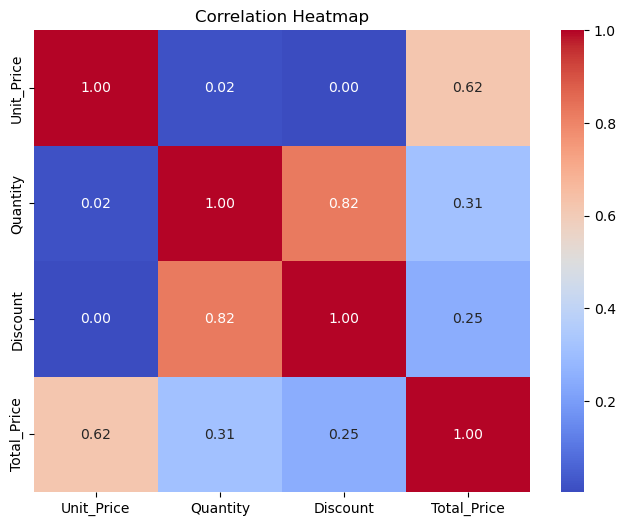

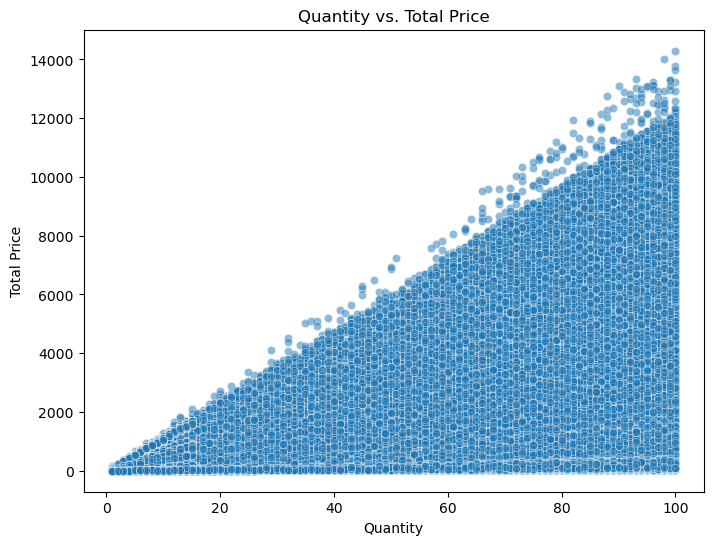

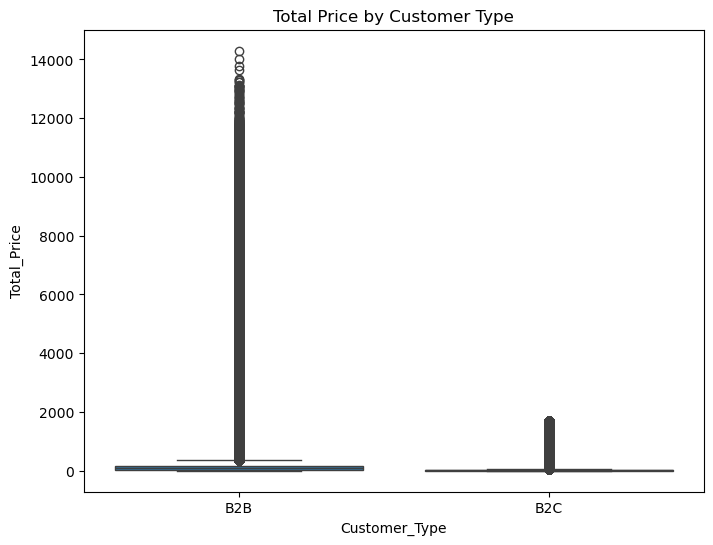

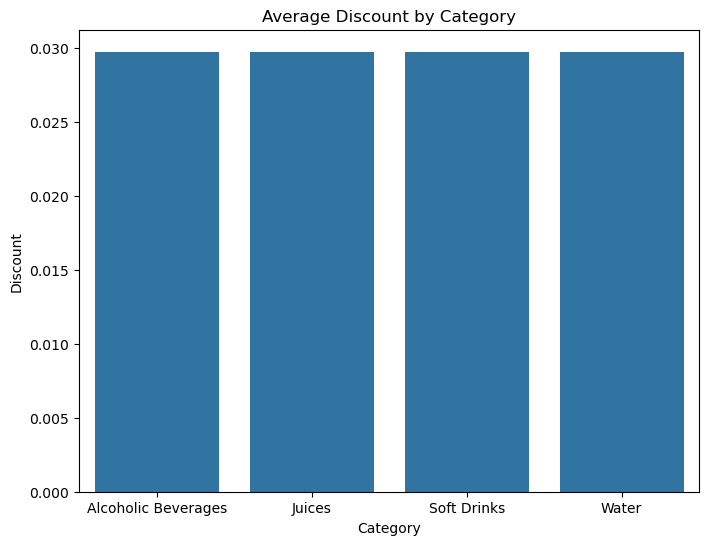

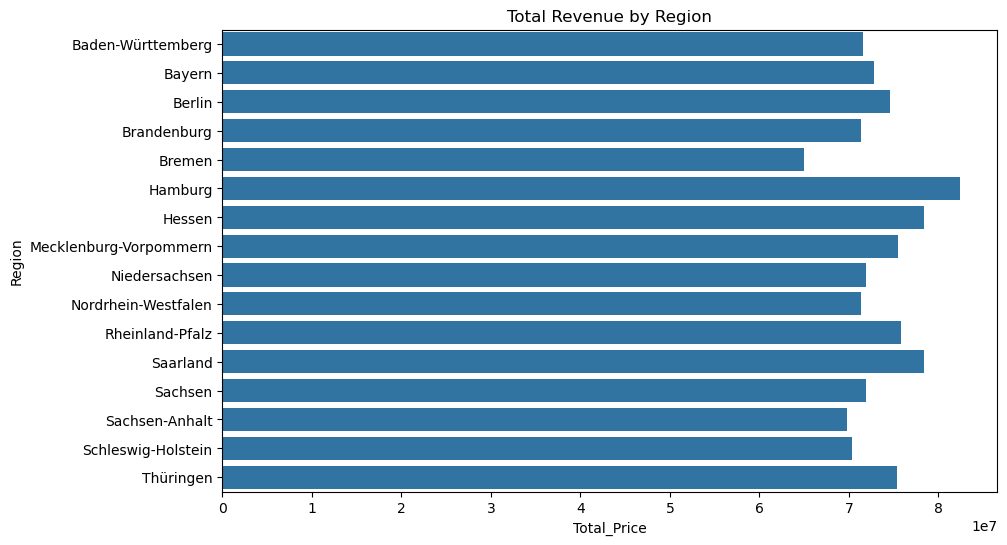

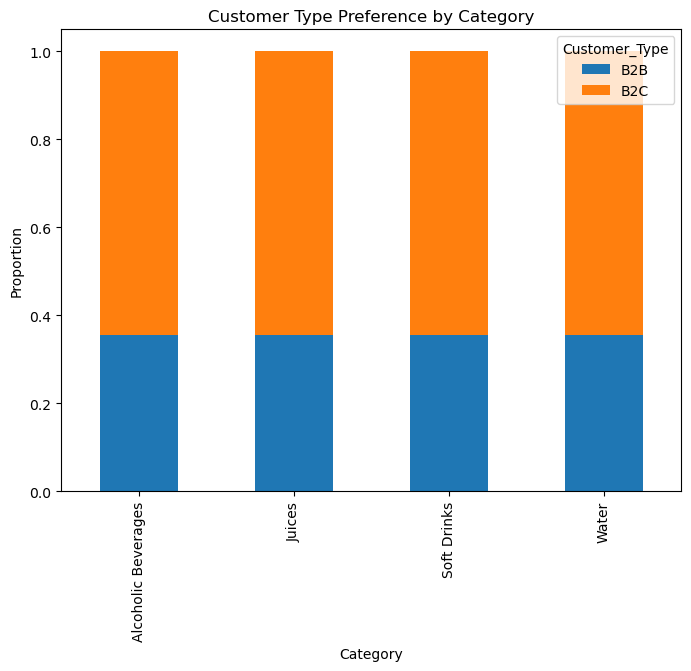

In [7]:
class BivariateAnalysis:
    def __init__(self, df: pd.DataFrame):
        self.df = df
    
    def correlation_heatmap(self):
        """Displays correlation heatmap between numerical variables."""
        plt.figure(figsize=(8, 6))
        sns.heatmap(self.df[['Unit_Price', 'Quantity', 'Discount', 'Total_Price']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
        plt.title('Correlation Heatmap')
        plt.show()
    
    def scatter_quantity_vs_total_price(self):
        """Scatter plot of Quantity vs. Total_Price."""
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=self.df['Quantity'], y=self.df['Total_Price'], alpha=0.5)
        plt.title('Quantity vs. Total Price')
        plt.xlabel('Quantity')
        plt.ylabel('Total Price')
        plt.show()
    
    def boxplot_total_price_by_customer_type(self):
        """Boxplot of Total_Price by Customer_Type."""
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=self.df['Customer_Type'], y=self.df['Total_Price'])
        plt.title('Total Price by Customer Type')
        plt.show()
    
    def barplot_avg_discount_by_category(self):
        """Bar plot showing average discount across categories."""
        plt.figure(figsize=(8, 6))
        avg_discount = self.df.groupby('Category')['Discount'].mean().reset_index()
        sns.barplot(x='Category', y='Discount', data=avg_discount)
        plt.title('Average Discount by Category')
        plt.show()
    
    def barplot_total_price_by_region(self):
        """Bar plot showing total revenue distribution across regions."""
        plt.figure(figsize=(10, 6))
        total_price_by_region = self.df.groupby('Region')['Total_Price'].sum().reset_index()
        sns.barplot(x='Total_Price', y='Region', data=total_price_by_region)
        plt.title('Total Revenue by Region')
        plt.show()
    
    def stacked_bar_customer_type_vs_category(self):
        """Stacked bar chart for Customer_Type vs. Category preference."""
        cross_tab = pd.crosstab(self.df['Category'], self.df['Customer_Type'], normalize='index')
        cross_tab.plot(kind='bar', stacked=True, figsize=(8, 6))
        plt.title('Customer Type Preference by Category')
        plt.ylabel('Proportion')
        plt.show()
    
    def run_bivariate_analysis(self):
        """Runs all bivariate analysis methods."""
        self.correlation_heatmap()
        self.scatter_quantity_vs_total_price()
        self.boxplot_total_price_by_customer_type()
        self.barplot_avg_discount_by_category()
        self.barplot_total_price_by_region()
        self.stacked_bar_customer_type_vs_category()


df = pd.read_csv("data/synthetic_beverage_sales_data.csv")
bivariate = BivariateAnalysis(df)
bivariate.run_bivariate_analysis()


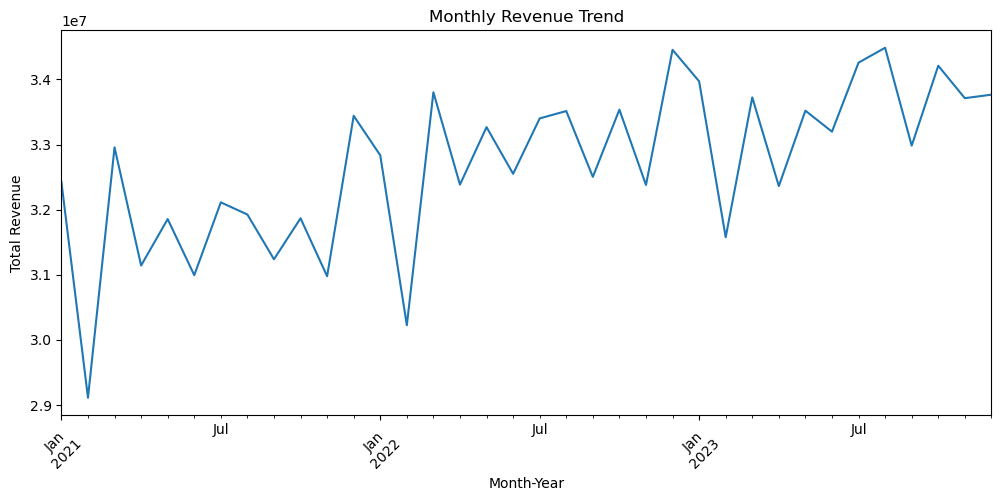

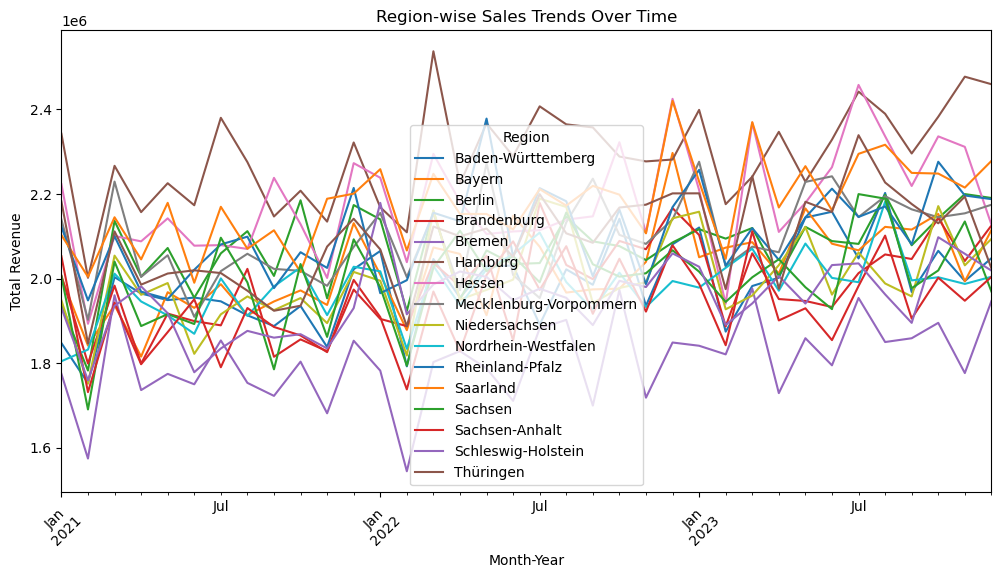

In [ ]:
class MultivariateAnalysis:
    def __init__(self, df: pd.DataFrame):
        self.df = df.copy()
        self.df['Order_Date'] = pd.to_datetime(self.df['Order_Date'])
        self.df['Month_Year'] = self.df['Order_Date'].dt.to_period('M')
    
    def time_series_revenue_trend(self):
        """Plots total revenue trends over time."""
        monthly_sales = self.df.groupby('Month_Year')['Total_Price'].sum()
        plt.figure(figsize=(12, 5))
        monthly_sales.plot()
        plt.title('Monthly Revenue Trend')
        plt.xlabel('Month-Year')
        plt.ylabel('Total Revenue')
        plt.xticks(rotation=45)
        plt.show()
    
    def region_sales_trend(self):
        """Plots region-wise sales trends over time."""
        region_sales = self.df.groupby(['Month_Year', 'Region'])['Total_Price'].sum().unstack()
        region_sales.plot(figsize=(12, 6))
        plt.title('Region-wise Sales Trends Over Time')
        plt.xlabel('Month-Year')
        plt.ylabel('Total Revenue')
        plt.legend(title='Region')
        plt.xticks(rotation=45)
        plt.show()
    
    def customer_clustering(self, n_clusters=3):
        """Performs K-Means clustering based on Total_Price, Quantity, and Discount."""
        features = self.df[['Total_Price', 'Quantity', 'Discount']]
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        self.df['Cluster'] = kmeans.fit_predict(features)
        
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=self.df['Quantity'], y=self.df['Total_Price'], hue=self.df['Cluster'], palette='viridis')
        plt.title('Customer Segmentation Based on Spending & Purchases')
        plt.show()
    
    def product_segmentation_pca(self):
        """Performs PCA for product segmentation."""
        features = self.df[['Total_Price', 'Quantity', 'Discount']]
        pca = PCA(n_components=2)
        principal_components = pca.fit_transform(features)
        
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1])
        plt.title('Product Demand Segmentation using PCA')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.show()
    
    def regression_analysis(self):
        """Performs regression analysis to determine the impact of Unit_Price, Quantity, and Discount on Total_Price."""
        X = self.df[['Unit_Price', 'Quantity', 'Discount']]
        X = sm.add_constant(X)  # Add constant term for intercept
        y = self.df['Total_Price']
        model = sm.OLS(y, X).fit()
        print(model.summary())
    
    
    def run_multivariate_analysis(self):
        """Runs all multivariate analysis methods."""
        self.time_series_revenue_trend()
        self.region_sales_trend()
        self.customer_clustering()
        self.product_segmentation_pca()
        self.regression_analysis()


df = pd.read_csv("data/synthetic_beverage_sales_data.csv")
multivariate = MultivariateAnalysis(df)
multivariate.run_multivariate_analysis()
